# <center>Método Implícito Centrado no Tempo (Método de Diferenciação Trapezoidal)</center>

Um esquema implícito de segunda ordem de precisão pode ser obtido se as duas expansões de série de Taylor são subtraídas:
$$
\begin{eqnarray} 
u_{j}^n  &=& u_{j}^n + \Delta t(u_t)_j^n + \frac{1}{2}(\Delta t)^2(u_{tt})_j^n + \frac{1}{6}(\Delta t)^3(u_{ttt})_j^n + \cdots \\
\tag{4.57}
u_j^{n} &=& u_j^{n+1}- \Delta t(u_t)_j^{n+1} + \frac{1}{2}(\Delta t)^2(u_{tt})_j^{n+1} - \frac{1}{6}(\Delta t)^3(u_{ttt})_j^{n+1} + \cdots \\
\end{eqnarray}
$$

Em seguida, $(u_{tt})_j^{n+1}$ é substituído por: 

$$
(u_{tt})_j^{n+1} = (u_{tt})_j^{n} + \Delta t(u_{ttt})_{j}^{n} + \cdots
$$

A expressão resultante torna-se: 
$$
\frac{u_j^{n+1}-u_j^{n}}{\Delta t} = \frac{1}{2}\left[(u_t)^n + (u_t)^{n+1}\right]_j + O\left[\left(\Delta t\right)^2\right] 
\tag{4.58}
$$

A diferenciação temporal nesta equação é conhecida como diferenciação trapezoidal ou diferenciação Crank-Nicolson. Ao substituir a equação de onda linear $u_t = -c u_x$, obtemos:

$$
\frac{u_j^{n+1}-u_j^n}{\Delta t} + \frac{c}{2}(u_x^{n} + u_x^{,n+1}) = O((\Delta t)^2) \tag{4.59}
$$

E, finalmente, se os termos $u_x$ forem substituídos por diferenças centrais de segunda ordem, o método implícito centrado no tempo é obtido:

$$
u_j^{n+1} = u_j^{n} - \frac{\nu}{4} \left(u_{j+1}^{n+1} + u_{j+1}^n - u_{j-1}^{n+1} - u_{j-1}^{n}\right) \tag{4.60}
$$

$j = 1, \ 2 \ \text{e} \ 3$ e marcando os termos conhecidos de vermelho, temos:

$$
u_1^{n+1} = \color{red}{u_1^{n}} - \frac{\nu}{4} \left(u_{2}^{n+1} + \color{red}{u_{2}^n} - \color{red}{u_{0}^{n+1}} - \color{red}{u_{0}^{n}}\right) 
$$

$$
u_2^{n+1} = \color{red}{u_2^{n}} - \frac{\nu}{4} \left(u_{3}^{n+1} + \color{red}{u_{3}^n} - u_{1}^{n+1} - \color{red}{u_{1}^{n}}\right) 
$$

$$
u_3^{n+1} = \color{red}{u_3^{n}} - \frac{\nu}{4} \left(\color{red}{u_{4}^{n+1}} + \color{red}{u_{4}^n} - u_{2}^{n+1} - \color{red}{u_{2}^{n}}\right) 
$$

Isolando os termos conhecidos para o lado direito e os desconhecidos para a esquerda

$$
\begin{eqnarray}
u_1^{n+1} + \frac{\nu}{4}u_{2}^{n+1} &=& \color{red}{u_1^{n}} - \frac{\nu}{4} \left(\color{red}{u_{2}^n} - \color{red}{u_{0}^{n+1}} - \color{red}{u_{0}^{n}}\right) \\
u_2^{n+1} + \frac{\nu}{4} \left(u_{3}^{n+1} - u_{1}^{n+1} \right) &=& \color{red}{u_2^{n}} - \frac{\nu}{4} \left(\color{red}{u_{3}^n} - \color{red}{u_{1}^{n}}\right) \\
u_3^{n+1} - \frac{\nu}{4}u_{2}^{n+1} &=& \color{red}{u_3^{n}} - \frac{\nu}{4} \left(\color{red}{u_{4}^{n+1}} + \color{red}{u_{4}^n} - \color{red}{u_{2}^{n}}\right)
\end{eqnarray}
$$

Transformando em matriz

$$
    \begin{bmatrix}
    1    & v/4  &  0 \\
    -v/4 & 1    & v/4 \\
    0    & -v/4 &  1 \\
    \end{bmatrix}
    \begin{bmatrix}
    u_{1}^{n+1} \\
    u_{2}^{n+1} \\
    u_{3}^{n+1} \\
    \end{bmatrix}
    = 
    \begin{bmatrix}
    \color{red}{u_1^{n}} - \frac{\nu}{4} \left(\color{red}{u_{2}^n} - \color{red}{u_{0}^{n+1}} - \color{red}{u_{0}^{n}}\right) \\
    \color{red}{u_2^{n}} - \frac{\nu}{4} \left(\color{red}{u_{3}^n} - \color{red}{u_{1}^{n}}\right) \\
    \color{red}{u_3^{n}} - \frac{\nu}{4} \left(\color{red}{u_{4}^{n+1}} + \color{red}{u_{4}^n} - \color{red}{u_{2}^{n}}\right) \\
    \end{bmatrix}
$$

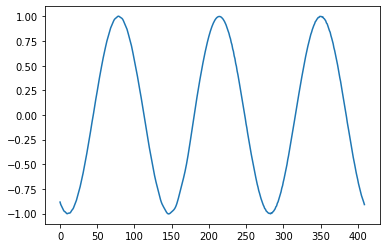

In [42]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# dados iniciais
l = 40
delta_x = 1
quantidade_de_pontos = 410
t_final = 180
c = 1
delta_t = 0.1
n = 3
x = np.linspace(0, l, quantidade_de_pontos)
t = np.arange(0, t_final+delta_t, delta_t)
quantidade_de_passos_de_tempo = len(t)
v = (delta_t / delta_x) * c

linhas  = quantidade_de_pontos - 2
colunas = quantidade_de_pontos - 2

u_num = np.zeros((quantidade_de_passos_de_tempo + 4, quantidade_de_pontos))
u_old = np.zeros(quantidade_de_pontos)
u_new = np.zeros(quantidade_de_pontos)

A = np.zeros((linhas + 1, colunas + 1))
C = np.zeros(linhas)

u_old[:] = np.sin(2*n*np.pi * x / l)
u_num[0, :] = u_old
u_new[:] = u_old

for i in range(0,linhas):
    A[i,i]   = 1
    A[i,i+1] = v/4
    A[i,i-1] = -v/4
    
A = np.delete(A, (-1), axis=0)
A = np.delete(A, (-1), axis=1)

#u_new[0] = u_new[-2]
#u_new[-1] = u_new[1]

for n in range(0, quantidade_de_passos_de_tempo - 1):
    C[:] = u_old[1:-1] - (v/4) * (u_old[2:]-u_old[0:-2])
    C[0]  = C[0]  + (v/4) * u_old[0]
    C[-1] = C[-1] - (v/4) * u_old[-1]

    u_new[1:-1] = np.linalg.solve(A, C)
    u_new[-1] = u_new[1]
    u_new[0] = u_new[-2]
    u_num[n + 1, :] = u_new
    u_old = u_new

plt.plot(u_old)
plt.show()

In [40]:
v

0.1